In [73]:
# import required packages, though not all of them are actually used
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import matplotlib.mlab as mlab
%matplotlib inline

plt.rcParams["figure.dpi"] = 80

import seaborn as sns
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import plotly.express as px

import stemgraphic as stem

from ete3 import Tree, faces, AttrFace, TreeStyle, TextFace

from mgt2001 import *
import mgt2001

import random
import itertools
import math

plt.style.use('ggplot') # refined style

mgt2001.__version__ # show version of mgt2001

'0.2.1'

In [74]:
import warnings; warnings.simplefilter('ignore') # https://docs.python.org/3/library/warnings.html#the-warnings-filter
# ignore for ignoring the message
# always to show the warning messages

In [75]:
df = pd.read_csv('data/menu.csv')
df.describe(include='all')

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260,260,260,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
unique,9,260,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Coffee & Tea,Sausage Biscuit with Egg (Regular Biscuit),16 fl oz cup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,95,1,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,NaN,NaN,NaN,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,NaN,NaN,NaN,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,NaN,NaN,NaN,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000


### Which food item has maximum sodium content?

+ Main source of sodium is table salt
+ Average American eats 5 teaspoons/day
+ Sodium mostly added during preparation
+ Foods that don't taste salty may be high in sodium
+ Sodium controls fluid balance in our bodies
+ Too much sodium may raise blood pressure
+ Target less then 2,000 mg/day

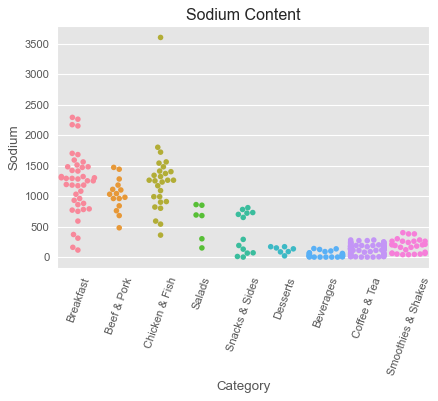

In [76]:
plot = sns.swarmplot(x='Category', y='Sodium', data=df, size=5)
plt.setp(plot.get_xticklabels(), rotation=70)
plt.title('Sodium Content')
plt.show()

In [77]:
df.Sodium.describe()

count     260.000000
mean      495.750000
std       577.026323
min         0.000000
25%       107.500000
50%       190.000000
75%       865.000000
max      3600.000000
Name: Sodium, dtype: float64

In [78]:
idx = df['Sodium'].idxmax()
df.at[idx, 'Item']

'Chicken McNuggets (40 piece)'

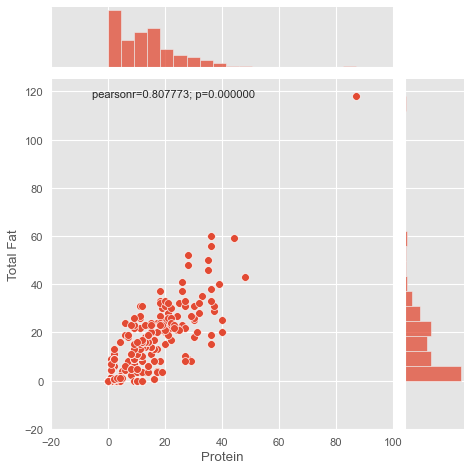

In [79]:
# fig = plt.subplot(1, 1, 1)
plot = sns.jointplot(x="Protein", y = "Total Fat", data=df, 
                    xlim=(-20,100),
                    ylim=(-20,125))
r, p = stats.pearsonr(df.Protein, df['Total Fat'])
phantom, = plot.ax_joint.plot([], [], linestyle="", alpha=0)
# here graph is not a ax but a joint grid, so we access the axis through ax_joint method

plot.ax_joint.legend([phantom],['pearsonr={:f}; p={:f}'.format(r,p)])
# mgt2001.add_margin(fig,x=0.05,y=0.01)
plt.show()

### How about sugars?

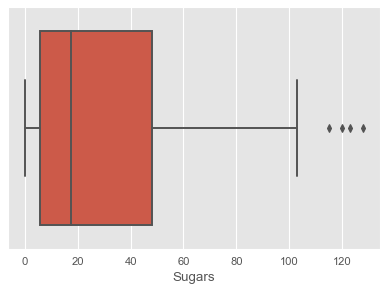

In [80]:
ax = sns.boxplot(x = df['Sugars'])
plt.show()